# <K-Nearest Neighbors, KNN>
K-최근접 이웃(KNN) 알고리즘은 머신 러닝의 지도 학습(Supervised Learning) 알고리즘 중 하나로, 분류(Classification)와 회귀(Regression) 문제 모두에 사용될 수 있는 간단하면서도 강력한 알고리즘입니다. KNN은 새로운 데이터가 주어졌을 때, 기존 데이터 중에서 가장 가까운 k개의 이웃을 찾아 그 이웃들의 정보를 바탕으로 새로운 데이터를 예측합니다.

In [6]:
import pandas as pd

fish = pd.read_csv("Data/fish.csv") 
fish.head()

,length,weight,target
0,25.4,242.0,bream
1,26.3,290.0,bream
2,26.5,340.0,bream
3,29.0,363.0,bream
4,29.0,430.0,bream


length, weight가 문제집  
target이 정답지

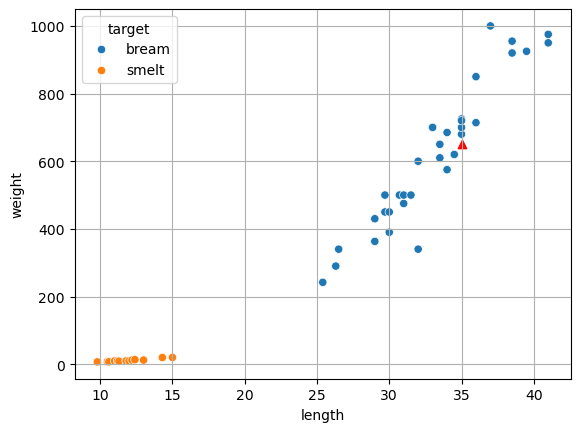

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=fish, x = "length", y = "weight", hue = "target")
plt.scatter(35, 650, marker = "^", color = "red")       # 길이가 35, 무게가 650인 점 표시
plt.grid()
plt.show()

# bream: 돔, smelt: 빙어

# 문제집과 정답지 만들기

In [54]:
# 문제집 : 2차원 행렬, 정답지 : 1차원 행렬이어야함  
# => 문제집을 length로만 하고 싶어도 괄호 두개. fish[["length"]]

X = fish[["length", "weight"]].values       # 문제집
Y = fish["target"].values                   # 정답지

# .values 붙이면 행렬로 바꿔줌

# KNN 분류 모델 만들기

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# KNN 분류 모델 학습하기

In [56]:
model.fit(X, Y)

KNeighborsClassifier()

# 길이가 35cm이고 무게가 650g인 생선 종류 예측하기

In [57]:
import warnings
warnings.filterwarnings("ignore")

A = [[35, 650]]   # 2차원 리스트로 표현해야함 
model.predict(A)
# 돔이라는 예측결과 나옴. 근데 얘를 얼마만큼 믿어야할까? 성능확인

array(['bream'], dtype=object)

# KNN 분류 모델 성능 확인하기

In [58]:
pred = model.predict(X)     # 문제집을 가지고 정답을 예측함 
pred    # 예측값

array(['bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt'],
      dtype=object)

In [59]:
Y    # 실제값

array(['bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'bream', 'bream', 'bream', 'bream', 'bream', 'bream', 'bream',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt',
       'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt', 'smelt'],
      dtype=object)

In [60]:
sum(pred == Y) / len(Y)      # 정확도
# 같으면 true, 틀리면 false 일때 맞는 것의 비율 (1이면 다 맞은 것)

1.0

In [61]:
model.score(X, Y)       # X로 예측한 값과 Y를 비교해서 정확도로 표시해라   (위의 과정과 동일)

1.0

In [62]:
A = [[35, 650]]
model.predict(A)

array(['bream'], dtype=object)

In [63]:
model.predict_proba(A)      

# 0일 확률이 100%, 1일 확률이 0%

array([[1., 0.]])

In [64]:
model.classes_

# 0이 bream, 1이 smelt를 의미

array(['bream', 'smelt'], dtype=object)

In [65]:
distance, idx = model.kneighbors(A)
distance, idx

# 가장 가까운 데이터들의 거리값, 위치값 반환해줌

(array([[ 1.5       , 30.        , 30.00416638, 35.0142828 , 40.02811512]]),
 array([[19, 23, 22, 21, 18]], dtype=int64))

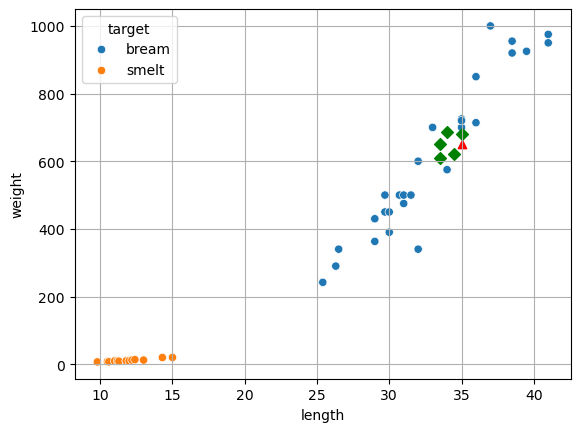

In [66]:
# 범위 구해줌

sns.scatterplot(data=fish, x = "length", y = "weight", hue = "target")
plt.scatter(35, 650, marker = "^", color = "red")
plt.scatter(X[idx,0], X[idx,1], marker = "D", color = "green")     # X[idx,0] : idx열의 length,   X[idx,1] : idx열의 weight
plt.grid()
plt.show()

# 데이터 분할하기

훈련데이터로만 학습을 하고, 시험데이터로 분류를 해보겠다 

In [68]:
from sklearn.model_selection import train_test_split   # 랜덤으로 섞어줄뿐만 아니라, 훈련데이터와 시험데이터의 타겟값의비율도 맞춰줌
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)
                                                        # 시험데이터에게 20%를 할당하겠다

# 훈련데이터의 문제집, 시험데이터의 문제집, 훈련데이터의 정답지, 시험데이터의 정답지  순으로 적어야함

# 문제집의 80%가 훈련데이터에, 20%가 시험데이터에 들어간다
# 정답지의 80%가 훈련데이터에, 20%가 시험데이터에 들어간다

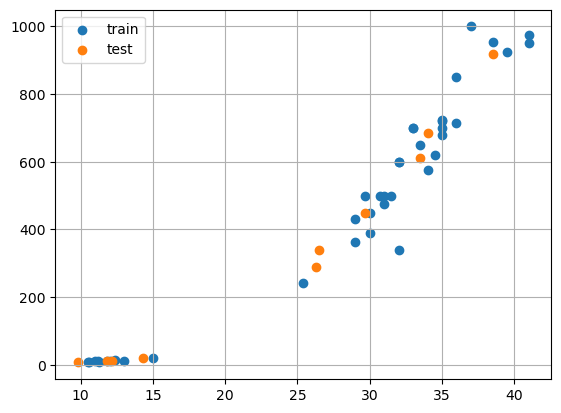

In [69]:
plt.scatter(train_x[:, 0], train_x[:, 1])     # 훈련데이터의 전체 범위에 대해 length, weight 표시
plt.scatter(test_x[:, 0], test_x[:, 1])     # 시험데이터의 전체 범위에 대해 length, weight 표시
plt.legend(["train", "test"])
plt.grid()
plt.show()

In [71]:
len(train_x), len(test_x)

(39, 10)

In [74]:
# 훈련데이터로 학습
model = KNeighborsClassifier()
model.fit(train_x, train_y)
model.score(test_x, test_y)   # test_x로 예측한 값과 test_y를 비교하라 

1.0

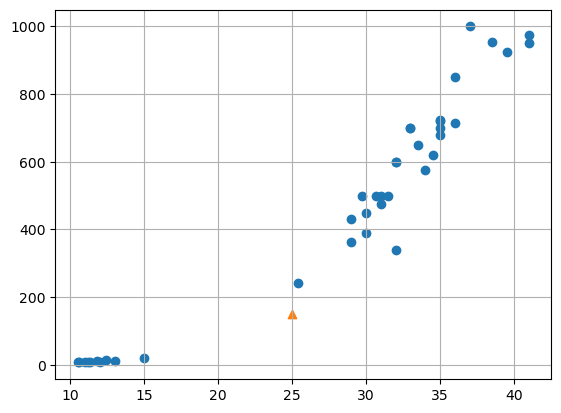

In [76]:
plt.scatter(train_x[:, 0], train_x[:, 1])     # 훈련데이터의 전체 범위에 대해 length, weight 표시
plt.scatter(25, 150, marker = "^")
plt.grid()
plt.show()

In [77]:
A = [[25,150]]             # 길이가 25, 무게가 150인 것에 대해 예측을 해보라했을 때
model.predict(A)

# 빙어라고 예측을 한다.. 돔이 나와야하는데

array(['smelt'], dtype=object)

In [78]:
distance, idx = model.kneighbors(A)
idx

array([[ 9,  0, 15, 22, 21]], dtype=int64)

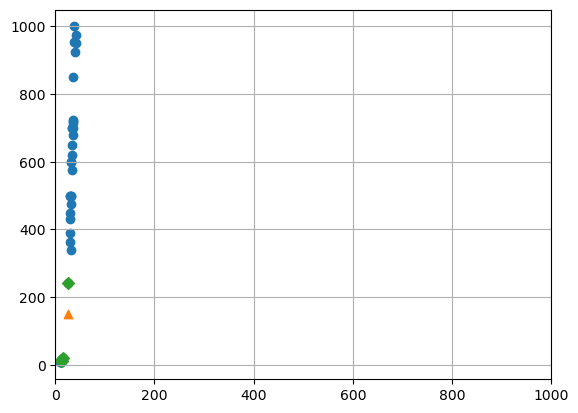

In [82]:
plt.scatter(train_x[:, 0], train_x[:, 1])
plt.scatter(25, 150, marker = "^")
plt.scatter(train_x[idx, 0], train_x[idx,1], marker = "D")        # 컴퓨터가 가깝다고 인식한 5개의 점 파악해보기
plt.xlim(0,1000)
plt.grid()
plt.show()

# y축은 200단위로 움직이는 반면, x축은 5단위로 움직여서  컴퓨터는 빙어 쪽이랑 더 가깝게 인식한 듯   =>   표준화를 해주자

In [83]:
model.predict_proba(A)

array([[0.2, 0.8]])

# 데이터 표준화

In [87]:
mean = train_x.mean(axis = 0)     # 길이데이터 평균과 무게데이터 평균 구해줌
std = train_x.std(axis = 0)       # 길이데이터 표준편차와 무게데이터 표준편차 구해줌

In [94]:
train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std        

# 시험데이터에  훈련데이터의 평균을 빼고 훈련데이터의 표준편차로 나눠도되나?  
# =>  시험데이터는 모르기 때문에 새로운 데이터가 들어오더라도 자기가 학습한 걸 기반으로 (=훈련데이터로) 표준화를 시켜줘야함

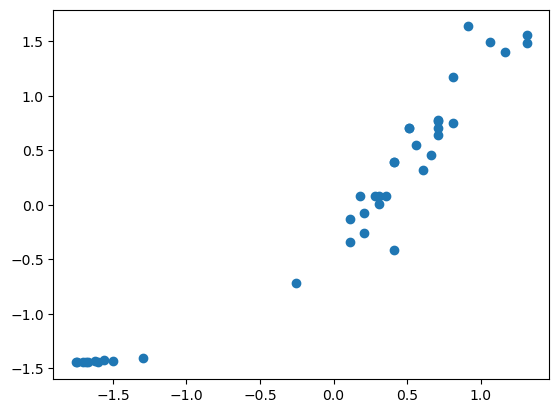

In [95]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.show()

# 축만 바뀌고 형태는 그대로다  =>  시험데이터도 훈련데이터로 표준화해줘도 괜찮다

In [96]:
# 표준화한 데이터를 기반으로 다시 학습

model = KNeighborsClassifier()
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

1.0

In [98]:
# 길이가 25, 무게가 150인 생선과 가장 가까운 데이터를 시각화

A = ([25, 150] - mean) / std     # 예측하고 싶은 데이터도 표준화해서 예측
model.predict([A])

array(['bream'], dtype=object)

In [101]:
_, idx = model.kneighbors([A])
idx

array([[ 9, 29,  6,  1, 10]], dtype=int64)

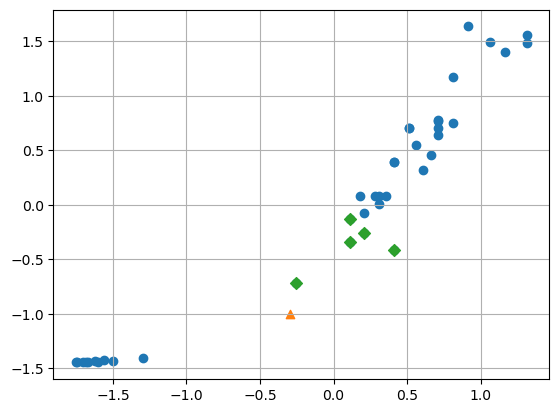

In [102]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])     # 훈련데이터의 전체 범위에 대해 length, weight 표시
plt.scatter(A[0], A[1], marker = "^")
plt.scatter(train_scaled[idx, 0], train_scaled[idx,1], marker = "D")
plt.grid()
plt.show()

# 최적의 K 값 찾기

In [103]:
# 데이터에 따라 최적의 이웃수가 다를 수가 있음. 루트(데이터개수)
model = KNeighborsClassifier()
model.fit(train_scaled, train_y)
box = []
for n in range(1, 31):       # 1~30까지 이웃숫자를 바꿔가면서 성능을 test해보려한다
    model.n_neighbors = n 
    score = model.score(test_scaled, test_y)
    box.append(score)

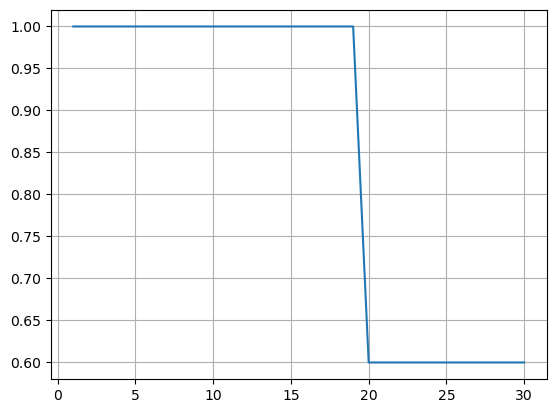

In [104]:
plt.plot(range(1,31), box)
plt.grid()
plt.show()

# 다수결에서 빙어는 다 틀렸다는 뜻?
# 최적의 K : 0~17 정도까지 성능이 다 좋으니까 그 사이에서 골라줄 것

In [105]:
model.n_neighbors = 3

# <KNN 모델 거리 계산>
* 유클리드 거리 (Euclidean Distance): 두 점 사이의 직선 거리를 계산하는 가장 일반적인 방법입니다.

In [106]:
model = KNeighborsClassifier(metric = "euclidean")      # 가장 효율적인 방법을 사용해 점과점사이를 계산한다 

* 맨해튼 거리 (Manhattan Distance): 두 점 사이의 거리를 각 좌표 축을 따라 이동하는 거리로 계산합니다. (L1 거리라고도 합니다.)

In [107]:
model = KNeighborsClassifier(metric = "manhattan") 

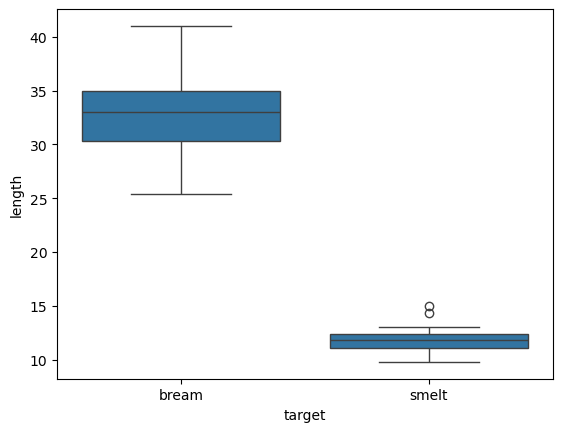

In [113]:
# 데이터 표준화 - Z-Score 표준화 방법 (평균 0, 표준편차 1)

sns.boxplot(data=fish, x="target", y="length")
plt.show()

# 평균에 영향을 줄 것 같은 이상치만 없애주면 됨

In [114]:
fish.describe()

,length,weight
count,49.000000,49.000000
mean,27.055102,444.500000
std,10.242804,328.143233
min,9.800000,6.700000
25%,14.300000,19.700000
50%,31.000000,500.000000
75%,34.500000,700.000000
max,41.000000,1000.000000


# 라이브러리로

In [122]:
from sklearn.preprocessing import StandardScaler       # 표준화 라이브러리

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)           # 훈련데이터의 평균과 표준편차를 학습하고 변환해라 
test_scaled = ss.transform(test_x)             # 테스트데이터에 대해서도

# 이상치 때문에 평균을 믿을 수 없을 때 - Robust Scaler

In [123]:
# Robust Scaler : 중앙값을 빼고 IQR로 나눔   (기존에 하던건 평균을 빼고 표준편차로 나눴었음)
import numpy as np

median = np.median(train_x, axis = 0)      # 길이데이터의 중앙값과 무게데이터의 중앙값 
IQR = np.quantile(train_x, 0.75, axis = 0) - np.quantile(train_x, 0.25, axis = 0)           # 0.75에 해당하는 값(Q3)에서 0.25에 해당하는 값(Q1) 빼기

In [124]:
train_scaled = (train_x - median) / IQR
test_scaled = (test_x - median) / IQR

train_scaled

array([[-1.11486486, -0.84368685],
       [ 0.03378378, -0.28117037],
       [ 0.23648649,  0.39539584],
       [ 0.37162162,  0.87865741],
       [ 0.10135135,  0.35146296],
       [-0.05405405,  0.        ],
       [-0.10135135, -0.19330463],
       [ 0.23648649,  0.38660926],
       [-0.03378378, -0.04393287],
       [-0.41216216, -0.45338722],
       [-0.16891892, -0.12301204],
       [ 0.64189189,  0.79079167],
       [-1.41891892, -0.86547755],
       [-0.10135135, -0.08786574],
       [ 0.03378378,  0.17573148],
       [-1.29054054, -0.85510939],
       [-1.38513514, -0.86161146],
       [-0.12162162,  0.        ],
       [ 0.30405405,  0.37606537],
       [ 0.23648649,  0.31631667],
       [-0.03378378,  0.        ],
       [-1.33108108, -0.86125999],
       [-1.25      , -0.85721817],
       [ 0.2027027 ,  0.21087778],
       [ 0.        ,  0.        ],
       [-1.36486486, -0.86336877],
       [-1.31756757, -0.86143573],
       [ 0.13513514,  0.26359722],
       [ 0.47297297,

In [125]:
from sklearn.preprocessing import RobustScaler

rb = RobustScaler()
rb.fit_transform(train_x)

array([[-1.11486486, -0.84368685],
       [ 0.03378378, -0.28117037],
       [ 0.23648649,  0.39539584],
       [ 0.37162162,  0.87865741],
       [ 0.10135135,  0.35146296],
       [-0.05405405,  0.        ],
       [-0.10135135, -0.19330463],
       [ 0.23648649,  0.38660926],
       [-0.03378378, -0.04393287],
       [-0.41216216, -0.45338722],
       [-0.16891892, -0.12301204],
       [ 0.64189189,  0.79079167],
       [-1.41891892, -0.86547755],
       [-0.10135135, -0.08786574],
       [ 0.03378378,  0.17573148],
       [-1.29054054, -0.85510939],
       [-1.38513514, -0.86161146],
       [-0.12162162,  0.        ],
       [ 0.30405405,  0.37606537],
       [ 0.23648649,  0.31631667],
       [-0.03378378,  0.        ],
       [-1.33108108, -0.86125999],
       [-1.25      , -0.85721817],
       [ 0.2027027 ,  0.21087778],
       [ 0.        ,  0.        ],
       [-1.36486486, -0.86336877],
       [-1.31756757, -0.86143573],
       [ 0.13513514,  0.26359722],
       [ 0.47297297,

# MinMax : 최대값을 1로 최소값을 0으로 하는 방법

In [130]:
# MinMax : 최대값을 1로 최소값을 0으로 하는 방법
min_value = train_x.min(axis = 0)
max_value = train_x.max(axis = 0)

train_scaled = (train_x - min_value) / (max_value - min_value)          # 정규화?
test_scaled = (test_x - min_value) / (max_value - min_value)
# pd.DataFrame(train_scaled).describe()

train_scaled

array([[1.47540984e-01, 1.29909366e-02],
       [7.04918033e-01, 3.35347432e-01],
       [8.03278689e-01, 7.23061430e-01],
       [8.68852459e-01, 1.00000000e+00],
       [7.37704918e-01, 6.97885196e-01],
       [6.62295082e-01, 4.96475327e-01],
       [6.39344262e-01, 3.85699899e-01],
       [8.03278689e-01, 7.18026183e-01],
       [6.72131148e-01, 4.71299094e-01],
       [4.88524590e-01, 2.36656596e-01],
       [6.06557377e-01, 4.25981873e-01],
       [1.00000000e+00, 9.49647533e-01],
       [0.00000000e+00, 5.03524673e-04],
       [6.39344262e-01, 4.46122860e-01],
       [7.04918033e-01, 5.97180262e-01],
       [6.22950820e-02, 6.44511581e-03],
       [1.63934426e-02, 2.71903323e-03],
       [6.29508197e-01, 4.96475327e-01],
       [8.36065574e-01, 7.11983887e-01],
       [8.03278689e-01, 6.77744209e-01],
       [6.72131148e-01, 4.96475327e-01],
       [4.26229508e-02, 2.92044310e-03],
       [8.19672131e-02, 5.23665660e-03],
       [7.86885246e-01, 6.17321249e-01],
       [6.885245

In [131]:
# 라이브러리 함수 활용

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()         # 이미지 데이터를 다룰 때 자주 사용. 이미지는 0~255 이므로 이상치 없어서
mm.fit_transform(train_x)

array([[1.47540984e-01, 1.29909366e-02],
       [7.04918033e-01, 3.35347432e-01],
       [8.03278689e-01, 7.23061430e-01],
       [8.68852459e-01, 1.00000000e+00],
       [7.37704918e-01, 6.97885196e-01],
       [6.62295082e-01, 4.96475327e-01],
       [6.39344262e-01, 3.85699899e-01],
       [8.03278689e-01, 7.18026183e-01],
       [6.72131148e-01, 4.71299094e-01],
       [4.88524590e-01, 2.36656596e-01],
       [6.06557377e-01, 4.25981873e-01],
       [1.00000000e+00, 9.49647533e-01],
       [0.00000000e+00, 5.03524673e-04],
       [6.39344262e-01, 4.46122860e-01],
       [7.04918033e-01, 5.97180262e-01],
       [6.22950820e-02, 6.44511581e-03],
       [1.63934426e-02, 2.71903323e-03],
       [6.29508197e-01, 4.96475327e-01],
       [8.36065574e-01, 7.11983887e-01],
       [8.03278689e-01, 6.77744209e-01],
       [6.72131148e-01, 4.96475327e-01],
       [4.26229508e-02, 2.92044310e-03],
       [8.19672131e-02, 5.23665660e-03],
       [7.86885246e-01, 6.17321249e-01],
       [6.885245

# MaxAbsScaler

In [135]:
# MaxAbsScaler : -1 ~ 1  //  0으로 대칭되면 좋을 것 같은 데이터에서 자주 사용
# MinMax를 음수까지 확장한 버전 

train_x / abs(train_x.max(axis = 0))       # 훈련데이터를  ??를 다 양수로 바꾼걸로 나눔 

array([[0.36585366, 0.0199    ],
       [0.7804878 , 0.34      ],
       [0.85365854, 0.725     ],
       [0.90243902, 1.        ],
       [0.80487805, 0.7       ],
       [0.74878049, 0.5       ],
       [0.73170732, 0.39      ],
       [0.85365854, 0.72      ],
       [0.75609756, 0.475     ],
       [0.6195122 , 0.242     ],
       [0.70731707, 0.43      ],
       [1.        , 0.95      ],
       [0.25609756, 0.0075    ],
       [0.73170732, 0.45      ],
       [0.7804878 , 0.6       ],
       [0.30243902, 0.0134    ],
       [0.26829268, 0.0097    ],
       [0.72439024, 0.5       ],
       [0.87804878, 0.714     ],
       [0.85365854, 0.68      ],
       [0.75609756, 0.5       ],
       [0.28780488, 0.0099    ],
       [0.31707317, 0.0122    ],
       [0.84146341, 0.62      ],
       [0.76829268, 0.5       ],
       [0.27560976, 0.0087    ],
       [0.29268293, 0.0098    ],
       [0.81707317, 0.65      ],
       [0.93902439, 0.955     ],
       [0.70731707, 0.363     ],
       [0.

In [138]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
mas.fit_transform(train_x)

array([[0.36585366, 0.0199    ],
       [0.7804878 , 0.34      ],
       [0.85365854, 0.725     ],
       [0.90243902, 1.        ],
       [0.80487805, 0.7       ],
       [0.74878049, 0.5       ],
       [0.73170732, 0.39      ],
       [0.85365854, 0.72      ],
       [0.75609756, 0.475     ],
       [0.6195122 , 0.242     ],
       [0.70731707, 0.43      ],
       [1.        , 0.95      ],
       [0.25609756, 0.0075    ],
       [0.73170732, 0.45      ],
       [0.7804878 , 0.6       ],
       [0.30243902, 0.0134    ],
       [0.26829268, 0.0097    ],
       [0.72439024, 0.5       ],
       [0.87804878, 0.714     ],
       [0.85365854, 0.68      ],
       [0.75609756, 0.5       ],
       [0.28780488, 0.0099    ],
       [0.31707317, 0.0122    ],
       [0.84146341, 0.62      ],
       [0.76829268, 0.5       ],
       [0.27560976, 0.0087    ],
       [0.29268293, 0.0098    ],
       [0.81707317, 0.65      ],
       [0.93902439, 0.955     ],
       [0.70731707, 0.363     ],
       [0.

In [139]:
# 정확도, 정밀도(예측한 값들 중에서 몇 개 맞았냐), 재현율(전체에서 몇 개를 잡아냈냐)

model = KNeighborsClassifier()
model.fit(train_scaled, train_y)     # 모델 만들어 표준화된 데이터로 학습시킴

KNeighborsClassifier()

In [140]:
pred = model.predict(test_scaled)    # 모델에게 예측하라 함

In [143]:
from sklearn.metrics import classification_report
report = classification_report(test_y, pred)        # 실제값을 먼저 입력하고 예측값을 뒤에
print(report)
                # 정밀도    # 재현율   # 정확도
              # bream 1.00     1.00    
                                    # accuracy 1.00

              precision    recall  f1-score   support

       bream       1.00      1.00      1.00         6
       smelt       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

